# SpecOneD Tutorital 1
## Single Spectrum Manipulation

This tutorial demonstrates the basic features of the SpecOneD python module. It is meant for first time users and should serve as an introduction to the higher functionality.

## 1. Loading and Displaying a spectrum in SpecOneD
We first initialize the SpecOneD module in our python environment.

In [1]:
from astrotools.speconed import speconed as sod

Now we are prepared instantiate as SpecOneD class and  open a fits file.

In [2]:
spec = sod.SpecOneD() 
spec.read_from_fits('data/J0341+1720.fits')

The class now holds the information from the fits file and one can access the dispersion/wavelength information using ".dispersion" and the flux information with ".flux". Errors on the flux are stored in ".flux_err". The fits header is also saves in ".header". 

In [3]:
print (spec.dispersion[:10])

print (spec.flux[:10])

print (spec.flux_err[:10])

print (spec.header['RA'], spec.header['DEC'])

[3653.0264967  3655.7843615  3658.5422263  3661.3000911  3664.0579559
 3666.81582071 3669.57368551 3672.33155031 3675.08941511 3677.84727991]
[-2.1928962e-17 -1.1240688e-17 -2.3404240e-17 -2.1753750e-17
 -2.1490399e-17 -1.7315024e-17 -1.2085817e-17 -2.2667136e-17
 -1.1556308e-17 -1.4341656e-17]
[1.25147579e-17 1.25300666e-17 1.27692185e-17 1.30017622e-17
 1.30827531e-17 1.33606841e-17 1.36606372e-17 1.38976468e-17
 1.39023038e-17 1.39476002e-17]
03:41:50.08 +17:20:43.9


We can easily display the spectrum using the built in ".plot()" function: 
#### def plot(self, show_flux_err=False, show_raw_flux=False, mask_values=True)
It offers toggle options to display the flux errors, the raw flux (a copy of the read in flux) and to mask the values specified in ".mask".

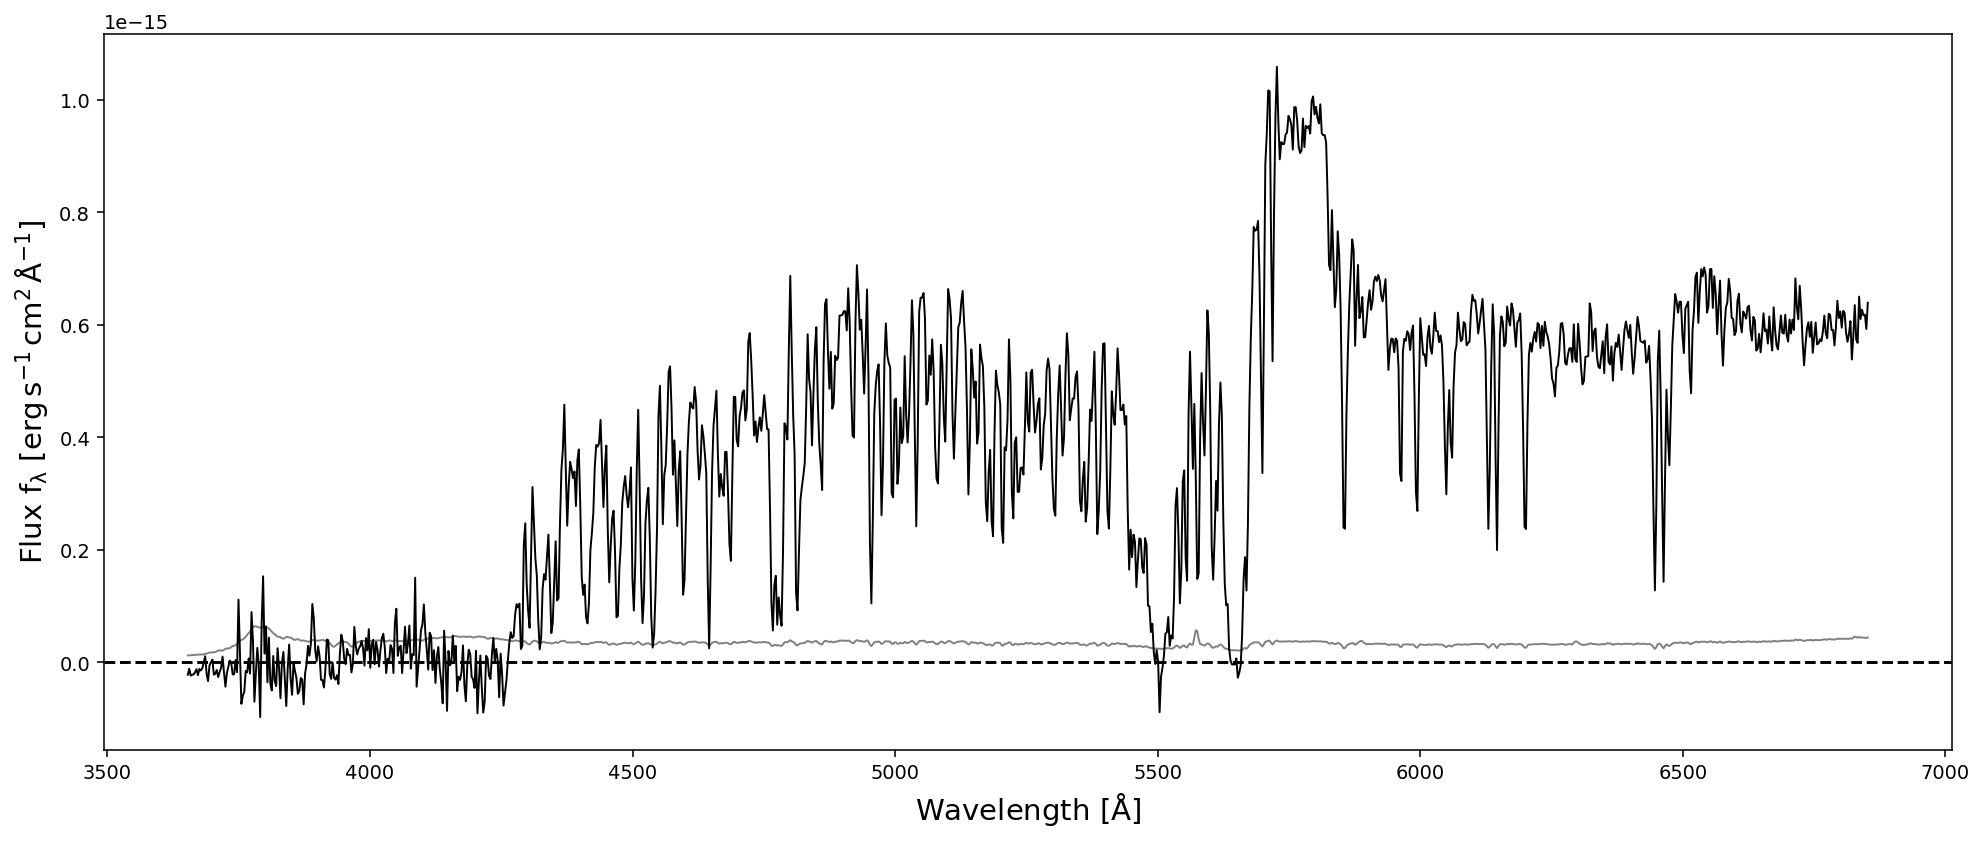

In [4]:
spec.plot(show_flux_err=True)

## 2. A few SpecOneD class properties

### 2.1 "Raw" dispersion, flux, flux error [.restore(), .override_raw()]

To allow for easy manipulation of the spectrum, the original dispersion, flux and flux error values are copied. Their copies are stored in ".raw_[dispersion,flux,flux_err]". These original values can be restored with ".restore()". 

However, it might be useful to copy the current values for dispersion, flux, and flux errors to the "raw" values. This is easily done using the ".override_raw()" function.


### 2.2 Copying a spectrum [.copy()]
A spectrum can be easily copied using the function ".copy()"

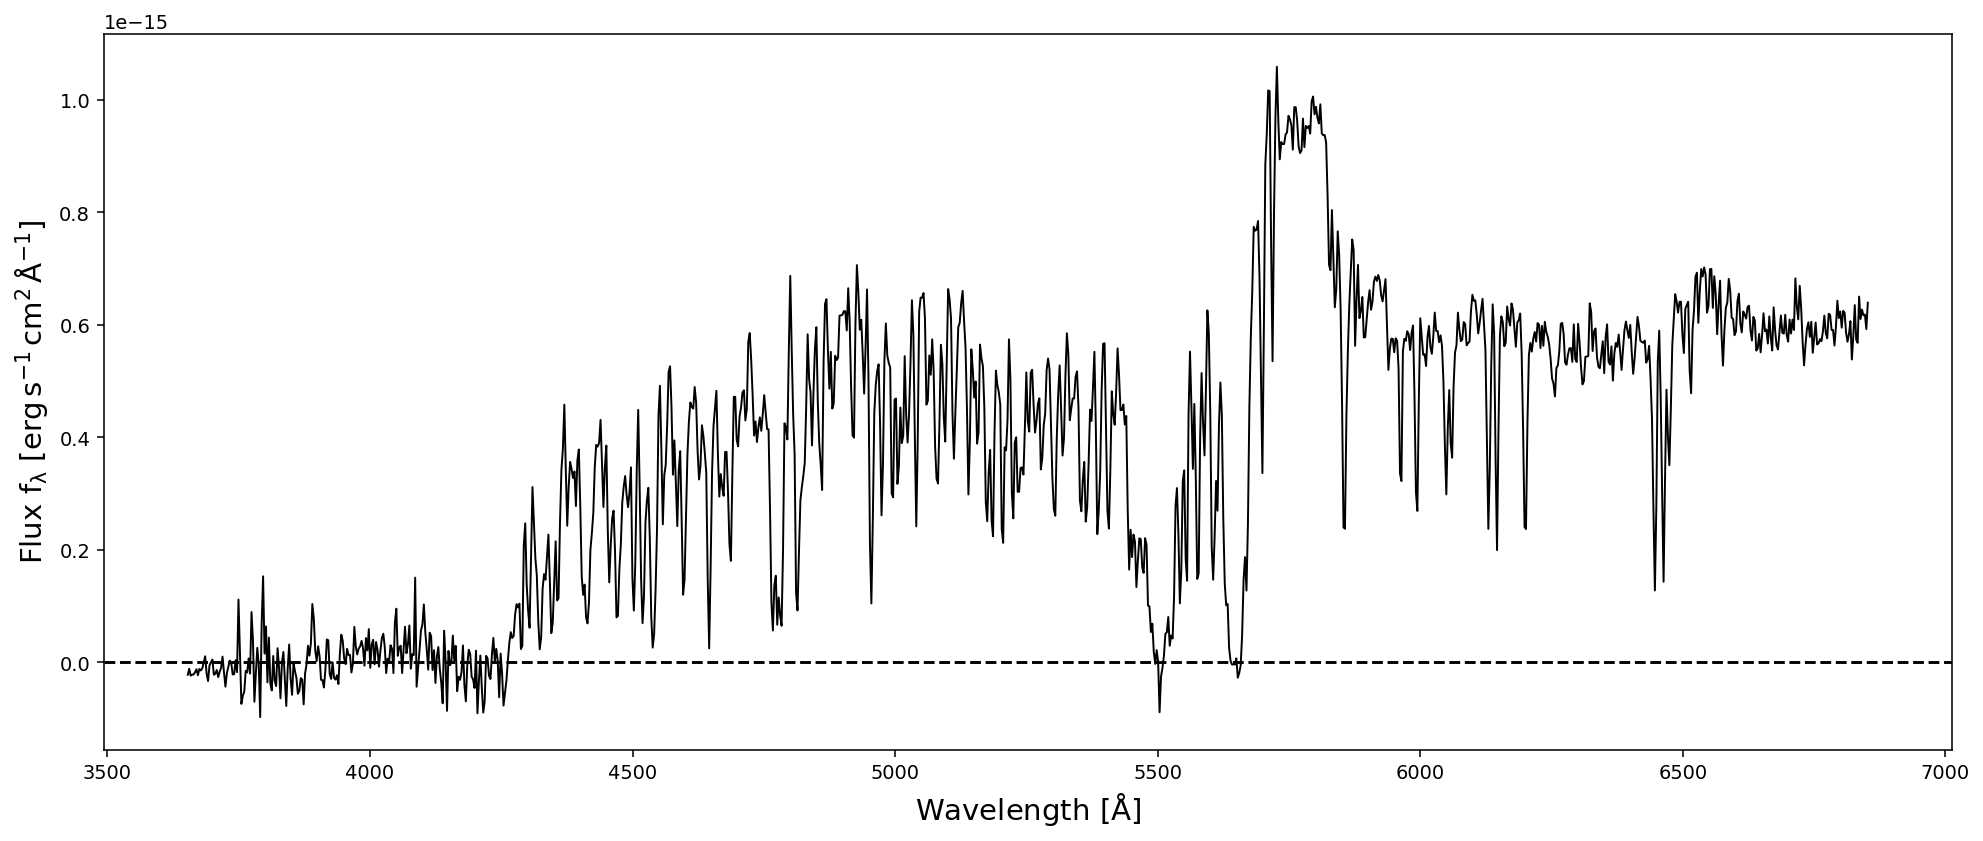

In [5]:
spec_copy = spec.copy()

spec_copy.plot()

### 2.3 Units [.unit, .to_wavelenght(), .to_frequency()]
There are many use cases, where a spectrum needs to be evaluated in wavelength or frequency space. Therefore each spectrum is given a .unit property, which specifices whether the flux is given with respect to Angstroem [.unit='f_lam'] or in Hertz [.unit='f_nu']. The flux should always be given in erg/s/cm^2/Hz for 'f_nu' or in erg/s/cm/Angstroem for 'f_lam'.

f_lam
f_nu


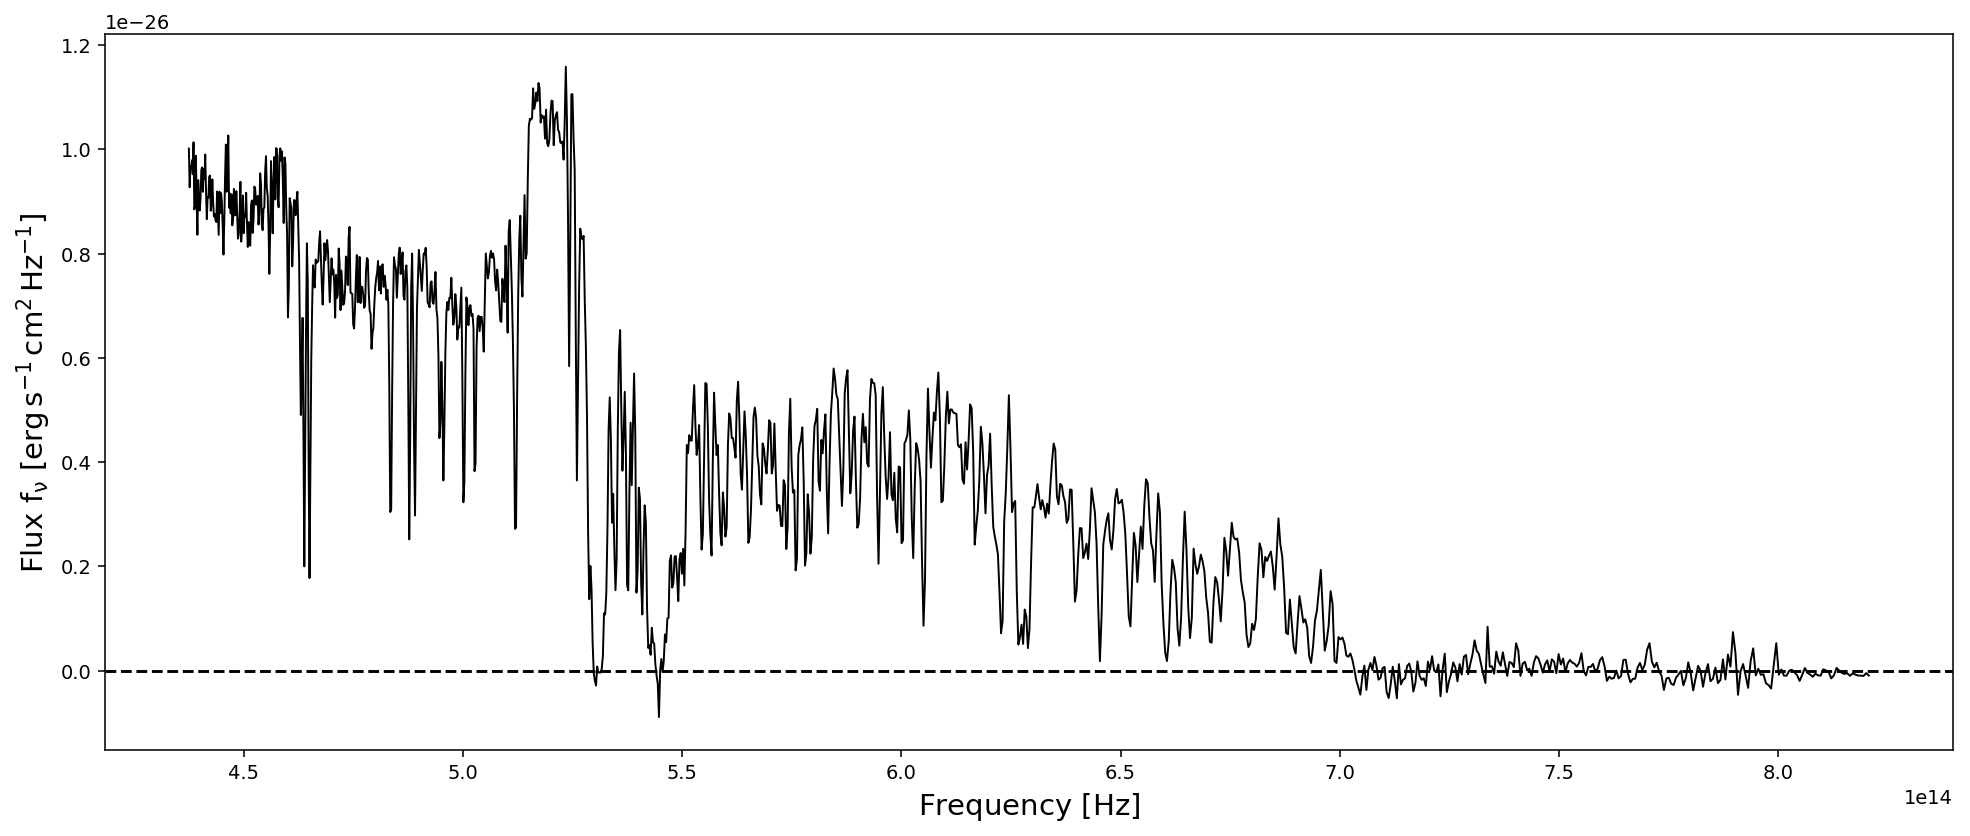

f_lam


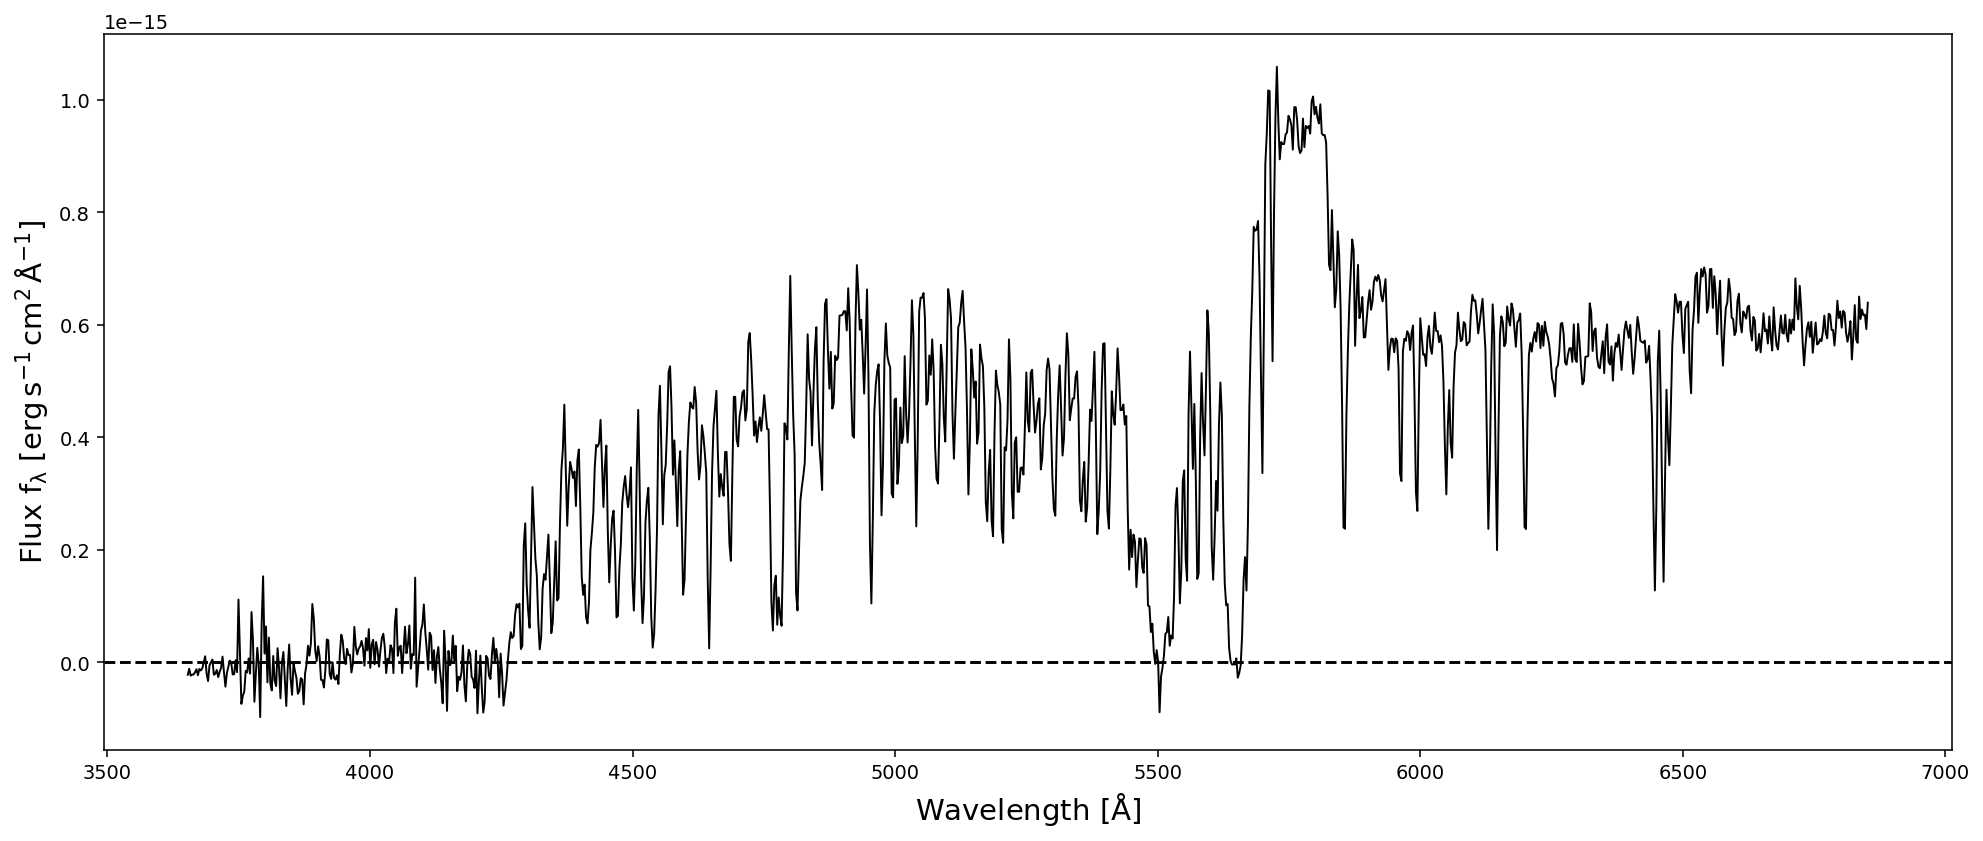

In [6]:
print (spec.unit)

spec.to_frequency()
print (spec.unit)
spec.plot()
spec.to_wavelength()
print (spec.unit)
spec.plot()

## 3 Simple manipulation

### 3.1 Trimming the dispersion [.trim_dispersion()]
There are many use cases, in which it is useful to be able to trim the dispersion axis of the spectrum to a pred-defined range. We can also learn here how the majority of functions does not change the spectrum but rather returns a manipulated version of it. Chaining the trim dispersion function with the plot function directly displays the trimmed spectrum.

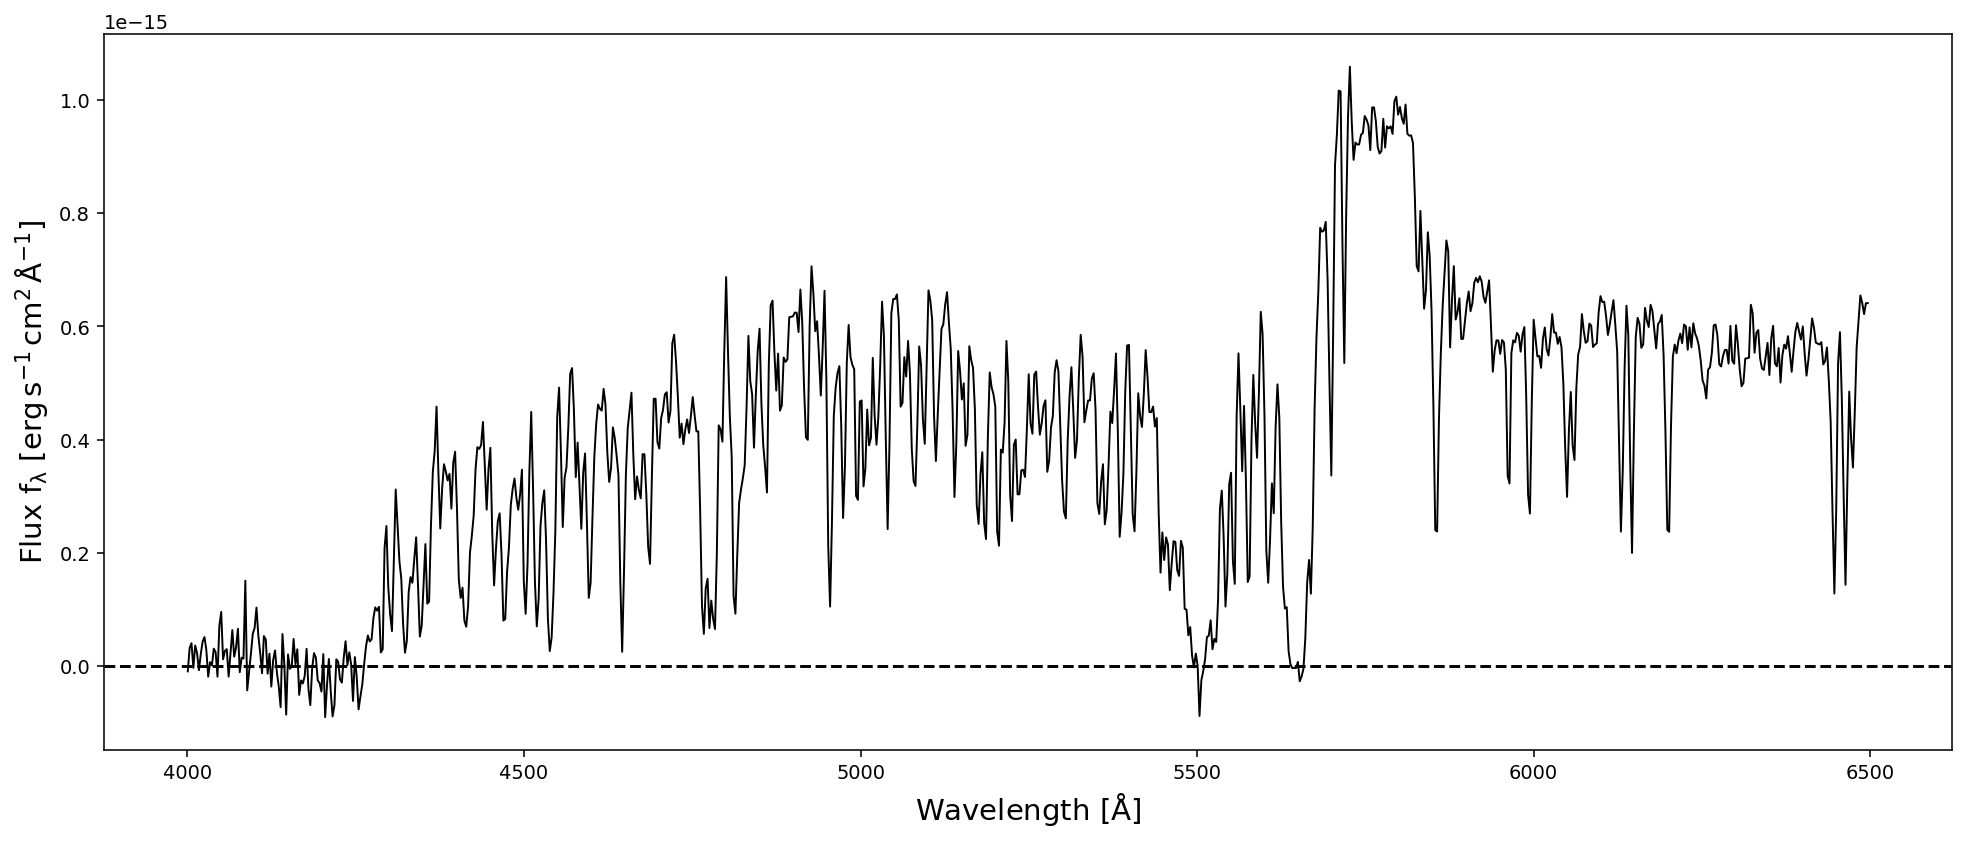

In [7]:
spec.trim_dispersion(limits=[4000,6500]).plot()

### 3.2 Smoothing [.smooth()]
The smooth function allows the flux to be smoothed by a Gaussian ('gaussian') or Boxcar ('boxcar') kernel. The 'width' keyword determines the number of dispersion elements for the kernel.

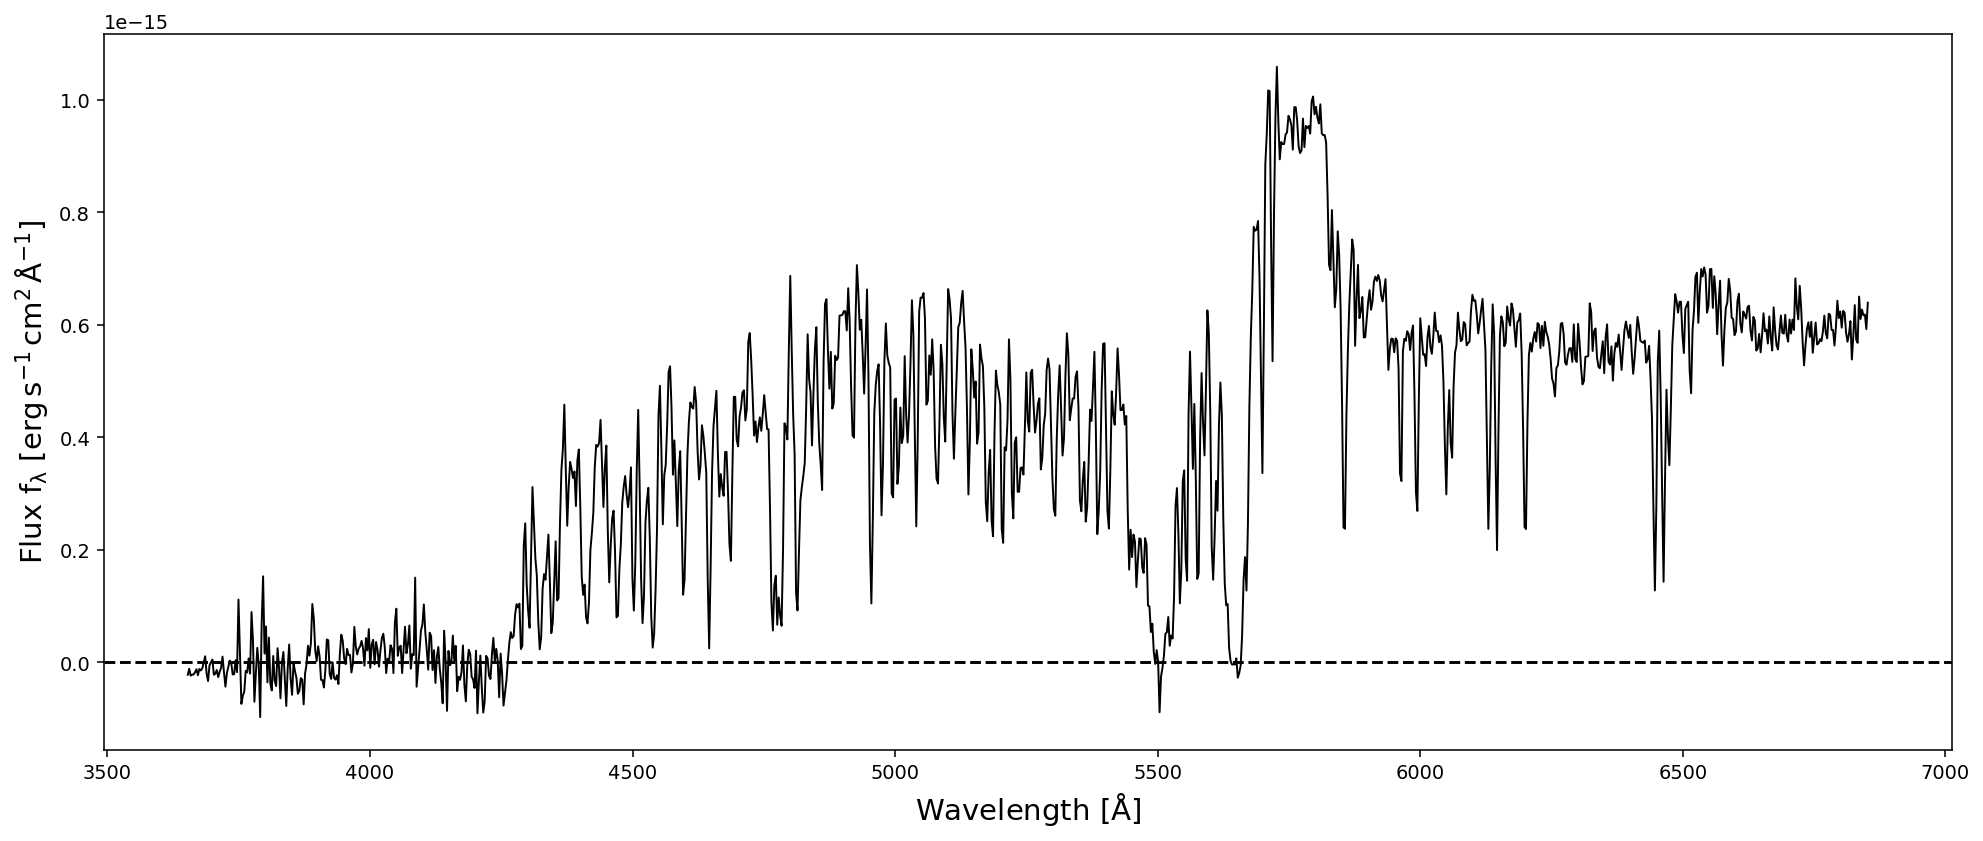

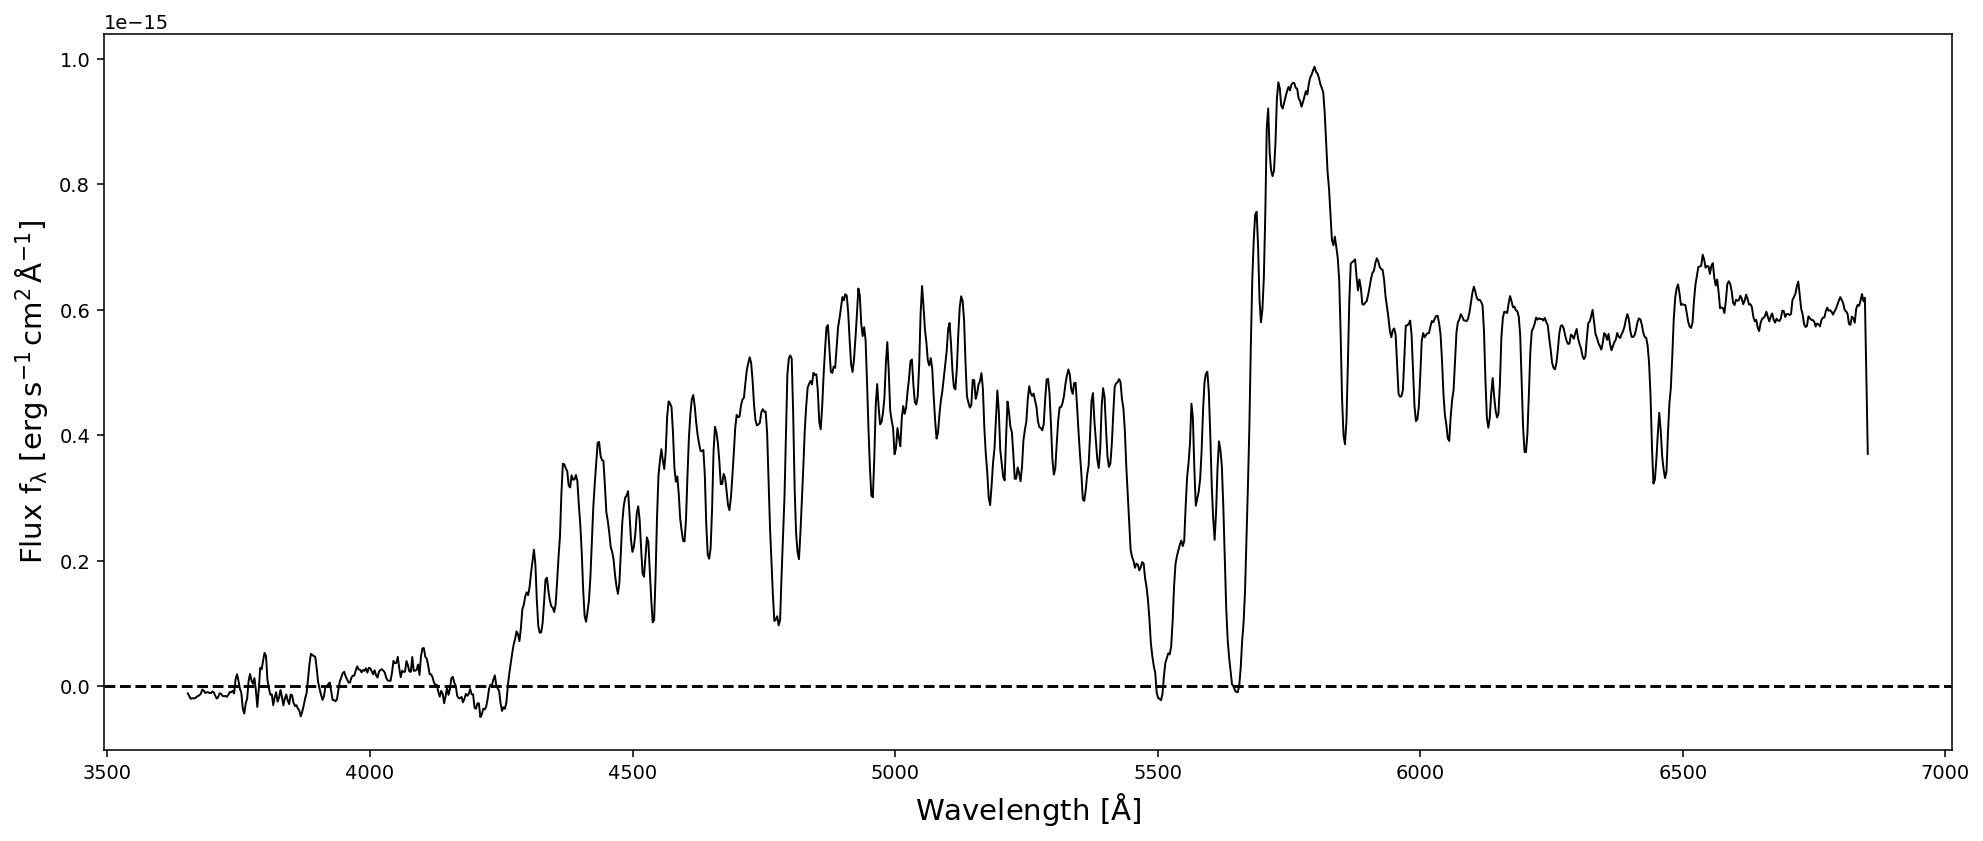

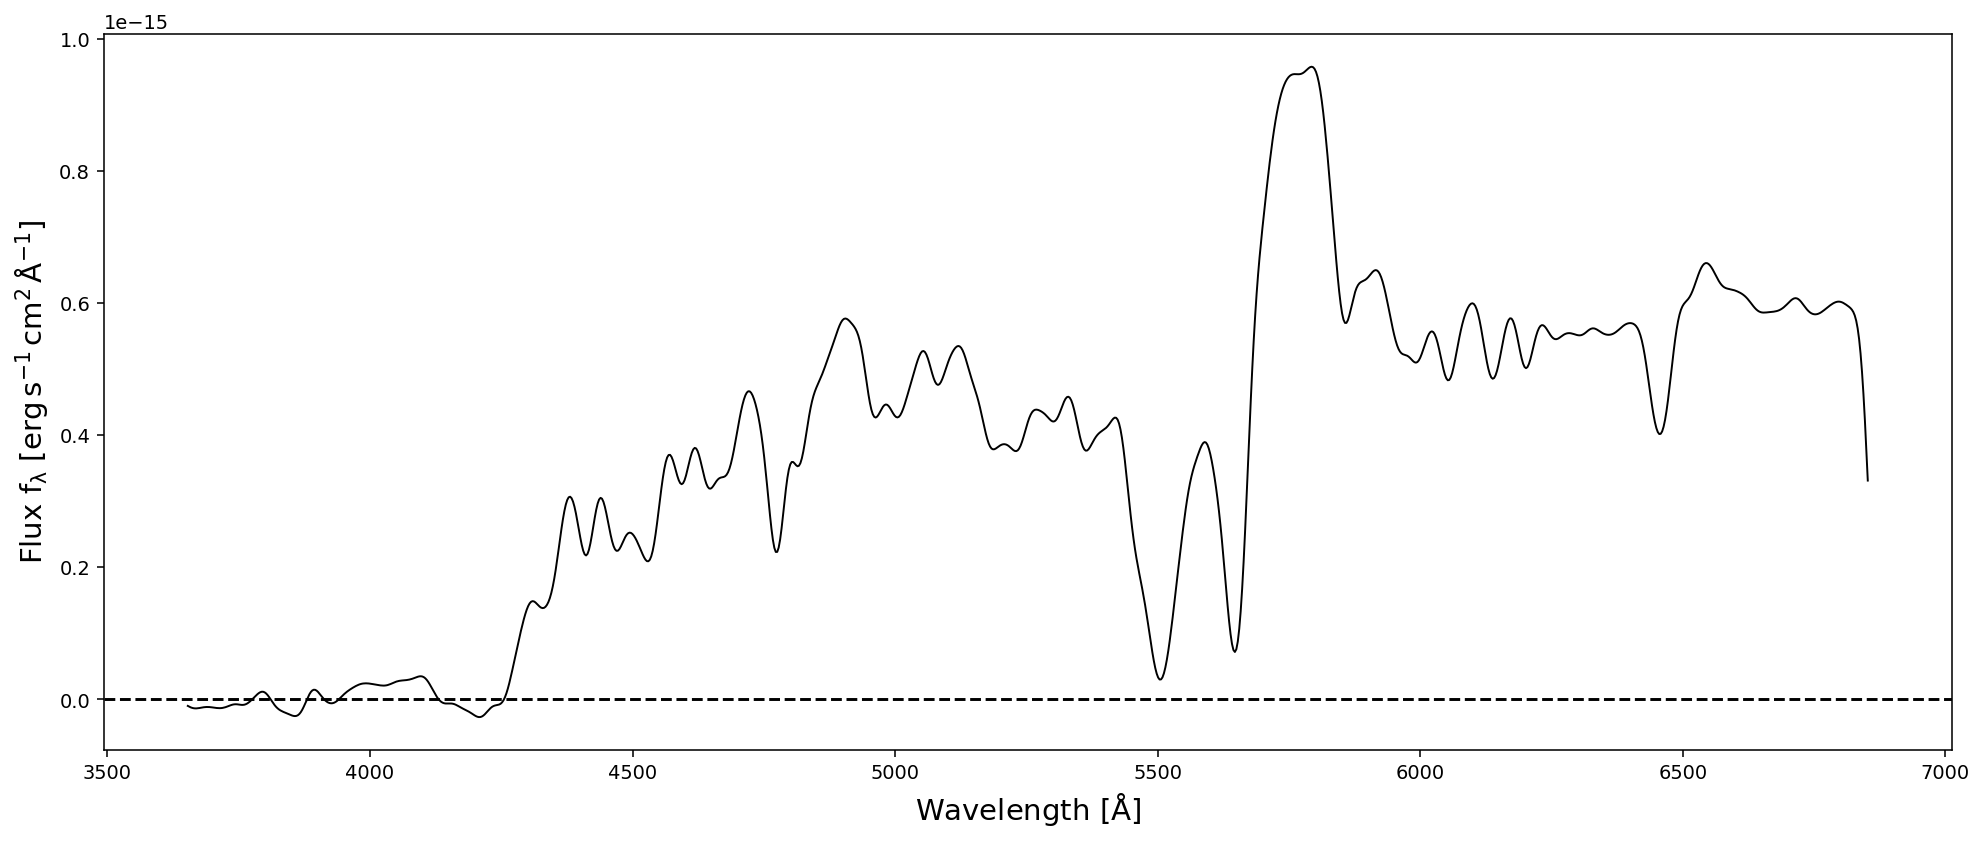

In [8]:
spec.plot()
spec.smooth(width=5,kernel='boxcar').plot()
spec.smooth(width=5,kernel='gaussian').plot()

### 3.3 Interpolating the flux [.interpolate()]
In order to manipulate two spectra (add, subtract, multiply, etc.) they often need to be on the same dispersion axis. The interpolate function achieves this by using the scipy interpolate.interp1d interpolation. The 'kind' keyword determines the order of the interpolation. We recommend to use 'linear', although higher orders can be used (see scipy interp1d documentation). 
If spectra do not fully overlap in dispersion space, there are regions of one spectrum that might have to be extrapolated (keyword 'fill_value'=['extrapolate','const']). Extrapolation is risky and often leads to large errors, therefore we urge the user to trim both spectra to the overlap region only. If this cannot be done, we recommend to use the 'const' option, which pads the extrapolated region by the mean flux value of the last ten dispersion elements before/after.

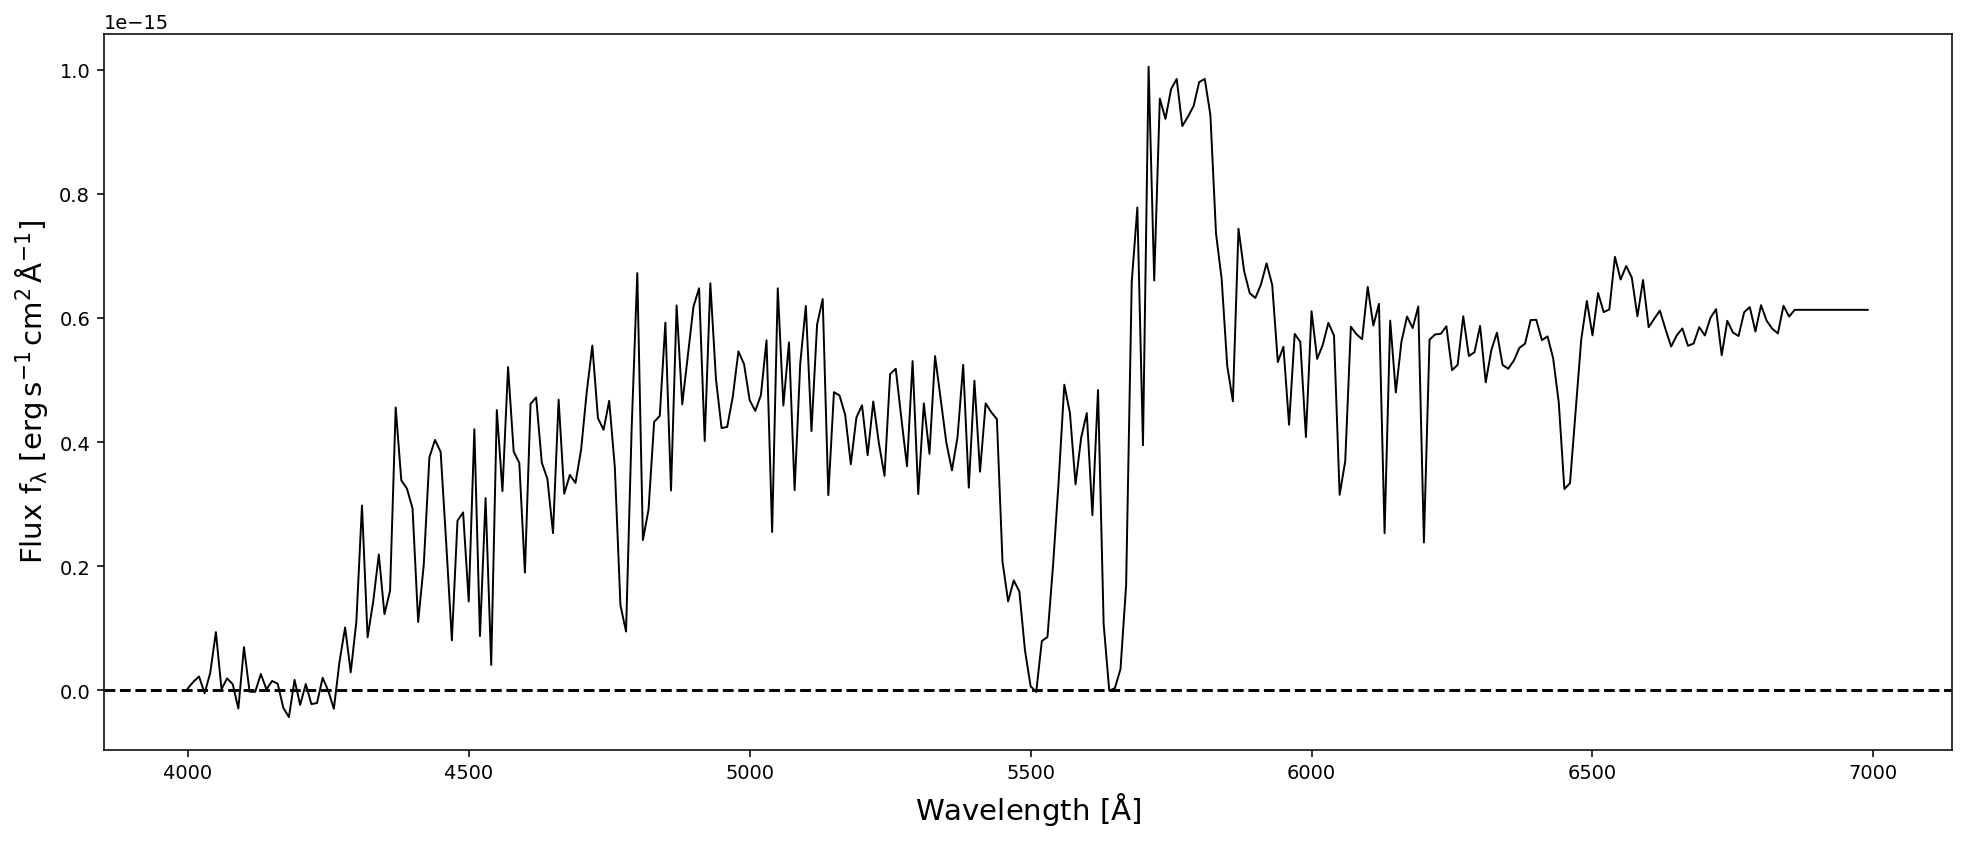

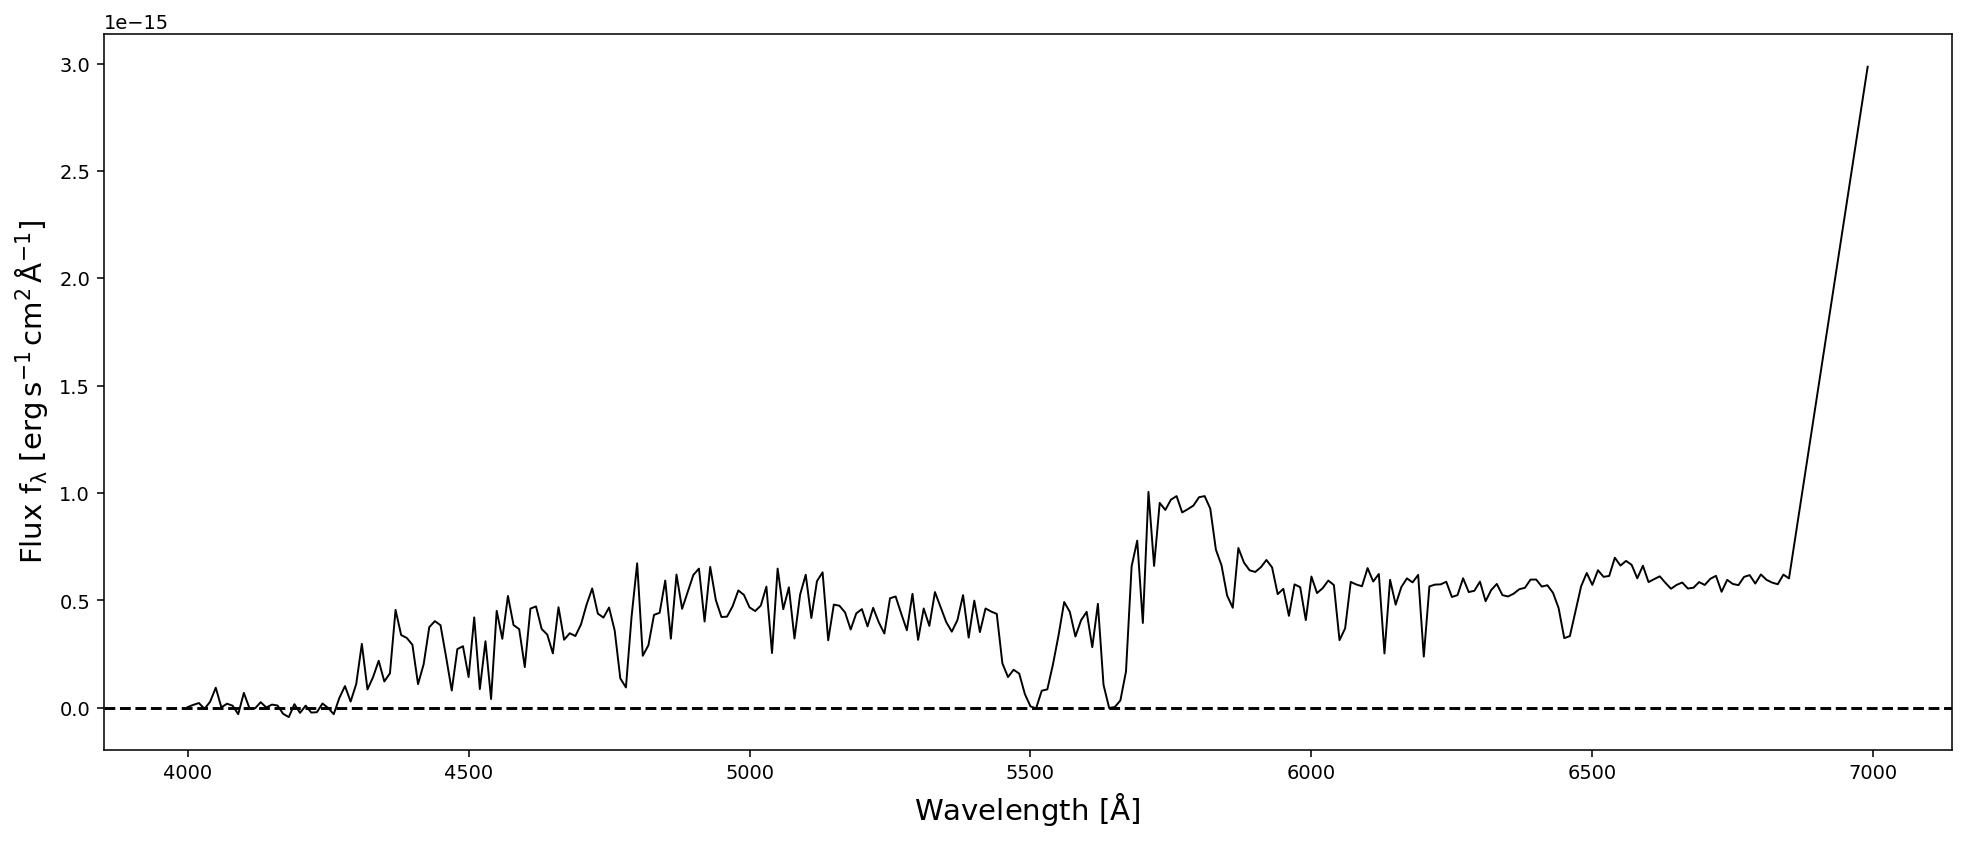

In [14]:
import numpy as np
new_dispersion = np.arange(4000,7000,10)

# The safe option is to pad extra dispersion elements.
spec_copy = spec.copy()
spec_copy.interpolate(new_dispersion, kind='linear',fill_value='const')
spec_copy.plot()

# And here we show the dangers of extrapolation
spec_copy2 = spec.copy()
spec_copy2.interpolate(new_dispersion, kind='linear', fill_value='extrapolate')
spec_copy2.plot()


#### We will end Tutorial 1 here and continue with spectral manipulations in Tutorial 2